In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 10              # 训练数据集数量
order = 9           # 线程方程级数
eta = 0.07          # 下降速率
delta_e = 0.00000001 # 损失递增最小值，用于判断是否收敛

#初始化数据集
X = np.linspace(0,1,n)  # 沿x轴，在0，1范围内，相同间隔生成n个数据
Y = np.sin(2*np.pi*X) + np.random.normal(0,0.2,n) # 目标值 + 噪音（符合高斯分布）

In [3]:
def calc_grad(n,m,w,X,Y):
    # n: 样本数据的数量
    # m: 线性方程的级数 order + 1
    # w: 系数
    # X: 样本数据集
    # Y: 样本数据的标签向量
    delta_error = np.zeros([m,1])
    for i in range(n):
        phi = np.zeros([m,1])
        for j in range(m):
            phi[j][0] = pow(X[i],j)
        error = single_error(m,w,X[i],Y[i]) 
        delta_error += error*phi
    return delta_error

In [4]:
def error(n,m,w,X,Y):
    squared_error = 0
    for i in range(n):
        error = single_error(m,w,X[i],Y[i])
        squared_error += error**2
    return squared_error/2

In [5]:
def single_error(m,w,x,y):
    pre_value = 0
    for i in range(m):
        pre_value += w[i][0]*pow(x,i)
    error = pre_value - y
    return error

In [6]:
m = order + 1
w = np.ones([m,1])  #随机生成 m个系数
e = 0
old_e = 0
for i in range(1000000):
    delta_error = calc_grad(n,m,w,X,Y)
    w = w - eta*delta_error
    e = error(n,m,w,X,Y)
    if i > 0 and ( e > old_e or (old_e - e) < delta_e):
        print(i)
        break
    old_e = e
print(e)
print(w)

279892
0.05255047908375603
[[-1.05993777e-02]
 [ 8.55399028e+00]
 [-2.19505130e+01]
 [ 1.98045989e+00]
 [ 8.79871534e+00]
 [ 6.26615755e+00]
 [ 1.43757797e+00]
 [-2.05100717e+00]
 [-2.73539984e+00]
 [-4.04038655e-01]]


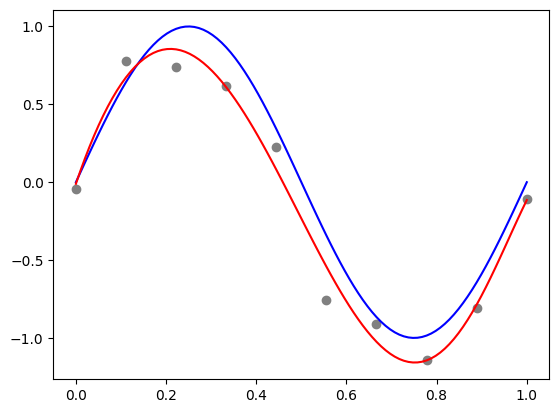

In [7]:
#绘制样例数据
plt.scatter(X,Y,color='grey')

#绘制原始曲线： y = sin(x)曲线
n1 = 100
X_1 = np.linspace(0,1,n1)  # 沿x轴，在0，1范围内，相同间隔生成n个数据
Y_1 = np.sin(2*np.pi*X_1)   # y = sin(x)
plt.plot(X_1,Y_1,color='blue')

# #绘制拟合函数线性函数的曲线：y = w0 + w1*x + w2*x*x + w3*x*x*x + ...
Y_2 = []
for x in X_1:
    y = 0
    for j in range(m):
        y += w[j][0]*pow(x,j)  
    Y_2.append(y) 
plt.plot(X_1,Y_2,color='red')

# 